In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import pymysql
import csv
import jieba
# header = id	name	price	comment_count	img 	href	shop
df = pd.read_csv('jd_spiders/goods.csv', sep=',',header=0)
df

,id,name,price,comment_count,img,href,shop
0,100000651175,OPPO K1 光感屏幕指纹 水滴屏拍照,1799.0,13万+,//img11.360buyimg.com/n7/jfs/t1/21655/40/104/2...,https://item.jd.com/100002325696.html?jd_pop=c...,NaN
1,5089235,Apple iPhone X (A1865) 64GB 深空灰色 移动联通电信4G,6799.0,113万+,//img13.360buyimg.com/n7/jfs/t10675/253/134476...,https://item.jd.com/5089253.html,京东Apple产品专营店
2,7694047,荣耀9i 4GB+64GB 幻夜黑 移动联通电信4G全面屏,1199.0,105万+,//img12.360buyimg.com/n7/jfs/t21415/332/642302...,https://item.jd.com/7694047.html,荣耀京东自营旗舰店
3,7437788,小米8 全面屏游戏智能,2499.0,82万+,//img13.360buyimg.com/n7/jfs/t19912/33/9271992...,https://item.jd.com/7437788.html,小米京东自营旗舰店
4,100001172674,一加,3599.0,7.1万+,//img14.360buyimg.com/n7/jfs/t1/6425/40/3887/2...,https://item.jd.com/100001172674.html,一加手机京东自营官方旗舰店
5,5821455,荣耀 V10 全网通高配版 6GB+64GB 幻夜黑 移动联通电信4G全面屏游戏,1999.0,101万+,//img14.360buyimg.com/n7/jfs/t13441/73/1250191...,https://item.jd.com/5853579.html,荣耀京东自营旗舰店
6,8735304,荣耀8X 千元屏霸 91%屏占比 2000万AI双摄 4GB+64GB 幻夜黑 移动联通电信...,1399.0,62万+,//img14.360buyimg.com/n7/jfs/t1/204/12/2599/82...,https://item.jd.com/8735304.html,荣耀京东自营旗舰店
7,100000287145,Apple iPhone XS Max (A2104) 256GB 深空灰色 移动联通电信4G,10999.0,22万+,//img13.360buyimg.com/n7/jfs/t1/3/15/4536/1386...,https://item.jd.com/100000287113.html,京东Apple产品专营店
8,100000349372,小米8青春版 镜面渐变AI双摄 6GB+64GB 梦幻蓝 全网通4G 双卡双待 全面屏拍照游戏智能,1699.0,14万+,//img10.360buyimg.com/n7/jfs/t1/2617/6/6143/23...,https://item.jd.com/100000503295.html?jd_pop=3...,NaN
9,7081550,荣耀10 GT游戏加速 AIS手持夜景 6GB+64GB 幻影蓝全网通 移动联通电信4G 双...,2198.0,90万+,//img10.360buyimg.com/n7/jfs/t18157/222/182230...,https://item.jd.com/7081550.html,荣耀京东自营旗舰店


In [177]:
# 获取评论数据
from jd_spiders.jd_spiders.server_config import MYSQL_PASSWD, MYSQL_HOST, MYSQL_USER
conn = pymysql.connect(host=MYSQL_HOST,port=3306,user=MYSQL_USER,passwd=MYSQL_PASSWD,charset='UTF8',db='comment')
get_comments_sql = 'SELECT content FROM jd_comment LIMIT 2000'
comments = pd.read_sql(get_comments_sql, conn)
comments


,content
0,这个价钱。也算是物超所值啦 高大上的赶脚 自带美颜相机哦赠品 帆布包
1,全新首款oppo K1型号，它拥有很多优势，提高了两千元以下的手机的门槛，中等高通骁龙660...
2,外观漂亮，屏幕一般，续航8小时，拍照能及格，适合女人用多一点
3,差！买来送女朋友的。本来想给她一个惊喜，结果差点分手！！！！对手机极度不满！！！！所谓的全面...
4,屏幕很灵敏，像素开十级美颜女友都认不出来，运行速度还行，电池续航还行，总结已经第三次购买了，...
5,我是双11买的，用了十几天来平价。货收到，从杭州到瑞安市到收货，物流用了五天。货收到包装完好...
6,非常完美 特别薄 手感超级好 oppo手机太震撼了 特别轻 完全不像千元机 看起来像...
7,首先是第二次在京东上面购买手机，给老婆买的，新出的机型，配置强大，骁龙八核心、6G+128G...
8,双十一买的，13号到的，颜色还不错，挺适合女生用，音量挺大的，拍照也还可以，指纹解锁稍微有点...
9,收到了 很不错的 很好用 触屏也很灵活 价钱也不贵比实体店划算多了 很满意


In [225]:
# 加载停用词列表
with open('CNstopwords.txt', 'r') as file:
    stopword_list = file.read().splitlines()


In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(stop_words=stopword_list)
tfidf = vector.fit_transform(comments['content'][:500])

wordlist = vector.get_feature_names()#获取词袋模型中的所有词  
# wordlist
# tf-idf矩阵 元素a[i][j]表示j词在i类文本中的tf-idf权重
weightlist = tfidf.toarray()  

# 打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
# for i in range(len(weightlist)):  
#     print ("-------第",i,"段文本的词语tf-idf权重------")  
#     for j in range(len(wordlist)):  
#         print(wordlist[j],weightlist[i][j])   
        
# n = 5 # 前五位
# for w in weightlist:
#     # 排序
#     loc = np.argsort(-w)
#     for i in range(n):
#         print(u'-{}: {} {}'.format(str(i + 1),wordlist[loc[i]], w[loc[i]]))
#     print('\n')

/usr/local/lib/python3.5/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


-1: 这个价钱 0.4472135954999579
-2: 也算是物超所值啦 0.4472135954999579
-3: 高大上的赶脚 0.4472135954999579
-4: 自带美颜相机哦赠品 0.4472135954999579
-5: 帆布包 0.4472135954999579


-1: 并且配送员的态度很好 0.2515870086453138
-2: 屏幕的尺寸够大了 0.2515870086453138
-3: 喜欢看电视的伙伴 0.2515870086453138
-4: 还有脸部识别一起用哦 0.2515870086453138
-5: 做到了隔天到货 0.2515870086453138


-1: 屏幕一般 0.4690320294799768
-2: 拍照能及格 0.4690320294799768
-3: 适合女人用多一点 0.4690320294799768
-4: 续航8小时 0.4690320294799768
-5: 外观漂亮 0.34646186123089595


-1: 默认偏暖是昏黄的 0.2132007163556104
-2: 屏幕显示总感觉不清明 0.2132007163556104
-3: 对手机极度不满 0.2132007163556104
-4: 说好的全面屏啊 0.2132007163556104
-5: 我实在是很不爽 0.2132007163556104


-1: 总结已经第三次购买了 0.30151134457776363
-2: 客服也有很多礼品送 0.30151134457776363
-3: 当天下午六点下单 0.30151134457776363
-4: 因为没有过质量问题 0.30151134457776363
-5: 像素开十级美颜女友都认不出来 0.30151134457776363


-1: 用了十几天来平价 0.23267403652261068
-2: 物流用了五天 0.23267403652261068
-3: 64g双11便宜了很多 0.23267403652261068
-4: k1是新上市 0.23267403652261068
-5: 货收到包装完好 0.23267403652261068


-1: 特别轻 0.33333333333333337
-2:



-1: 拍照效果很不错 0.661747730522533
-2: 手机很好 0.5503031429797348
-3: 很好用 0.509172261592187
-4: 10 0.0
-5: 每次都会先试试再评价的 0.0


-1: 比超市便宜 0.5352629024812227
-2: 快捷 0.5352629024812227
-3: 方便 0.47838878458866485
-4: 挺好的 0.4451195583599244
-5: 10 0.0


-1: 一直相信京东商城的品质 0.7583579539286374
-2: 质量不错 0.6518383340316605
-3: 10 0.0
-4: 每次都会先试试再评价的 0.0
-5: 每次都是大宗采购 0.0


-1: 不失大气 0.5403280062784105
-2: 快递速度速度速度 0.5403280062784105
-3: 续航给力 0.506743958896701
-4: 外观漂亮 0.3991263601719317
-5: 10 0.0


-1: 值得拥有 0.611634606264671
-2: 值得信赖 0.611634606264671
-3: 值得购买 0.5018029661519765
-4: 每次都是送货到家 0.0
-5: 比一般的好多了 0.0


-1: 操作流畅 0.6422594681203264
-2: 很喜欢 0.5529284627506325
-3: 外观漂亮 0.5308228430371262
-4: 每次都是大宗采购 0.0
-5: 每次都是送货到家 0.0


-1: 就是钱不好 0.5
-2: 电池挺好的 0.5
-3: 反正都好 0.5
-4: 屏幕也挺好的 0.5
-5: 10 0.0


-1: 非常不错的一款手机 1.0
-2: 10 0.0
-3: 毕竟1399买的 0.0
-4: 比较好用 0.0
-5: 比较可以 0.0


-1: 手机很快就送到了 0.7925455296586179
-2: 值得购买 0.6098127445520801
-3: 毕竟卖家也不能控制物流的速度啊 0.0
-4: 毕竟1399买的 0.0
-5: 比较好用 0.0


-1: 千元机算不错的了 0.57735026

In [231]:
from pyhanlp import *
TextRankKeyword = JClass("com.hankcs.hanlp.summary.TextRankKeyword")

conn = pymysql.connect(host=MYSQL_HOST,port=3306,user=MYSQL_USER,passwd=MYSQL_PASSWD,charset='UTF8',db='comment')
get_single_comments_sql = 'SELECT content FROM jd_comment LIMIT 500'
comments_s = pd.read_sql(get_single_comments_sql, conn)
s = ' '.join(comments['content'])
keyword_list = HanLP.extractKeyword(s, 50)
for k in keyword_list:
    print(k)

手机
京东
买
不错
没有
屏幕
非常
很好
苹果
问题
喜欢
说
感觉
没
速度
快
真的
很快
快递
屏
流畅
东西
会
一直
物流
满意
有点
收到
外观
买了
包装
系统
使用
指纹
拍照
手感
X
性价比
运行
知道
现在
希望
太
好看
价格
购买
正品
评价
特别
解锁


(-0.5, 933.5, 1499.5, -0.5)

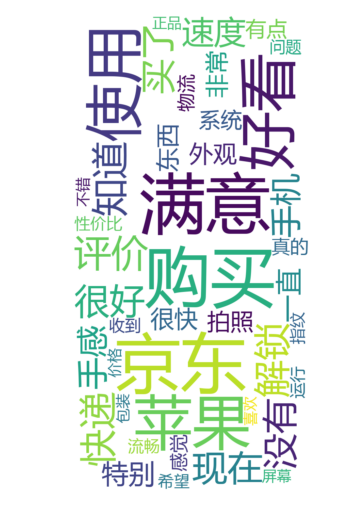

In [263]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
phone_mask = np.array(Image.open("phone.jpg"))
wordcloud = WordCloud(background_color="white", font_path='msyh.ttf', 
                      mask=phone_mask, contour_color='steelblue').generate(' '.join(keyword_list))

plt.figure(figsize=(16, 9),)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

In [136]:

index=0
for i in tagsN:
    for j in tagsA:
        
        commit_index.loc[index,:]=[i+j,model.similarity(i,j)]
        index+=1

comit_index_final=commit_index.sort_values(by='similarity',ascending=False)
comit_index_final

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


,commit,similarity
185,电池耐用,0.961467
167,外观漂亮,0.956498
215,玩游戏耐用,0.950988
179,外观合适,0.933133
169,外观很棒,0.930987
92,手感漂亮,0.926694
94,手感很棒,0.918877
222,玩游戏一般,0.905026
104,手感合适,0.896003
192,电池一般,0.883296


In [48]:
from pyhanlp import *
ll = []
CoNLLWord = JClass("com.hankcs.hanlp.corpus.dependency.CoNll.CoNLLWord")
count = 0
for s in comments['content'][35:40]:   
    print(s)
    sentence = HanLP.parseDependency(s) # 词法依存分析 
    print(sentence)
    word_array = sentence.getWordArray()
    last = ''
    
#     for word in word_array:
#         if word.DEPREL == '主谓关系':        
#             head = word
#             test = word.LEMMA  
#             while head.HEAD:           
#                 if head.DEPREL == '并列关系':
#                     break
#                 if head.HEAD.CPOSTAG == 'a'  or head.HEAD.CPOSTAG == 'd':
#                     if head.DEPREL != '并列关系':

#                         test+= '+' + head.HEAD.LEMMA
#                         print('**', word.LEMMA+ head.HEAD.LEMMA, '**')
#                         count+=1
#                     else:
#                         test+= '|' + head.HEAD.LEMMA
#                 if (head == CoNLLWord.ROOT):
#                     print(head.LEMMA)
#                     print(head)
#                 else:
#                     print("%s %s --(%s)-->  %s %s" 
#                           % (head.LEMMA, head.CPOSTAG, head.DEPREL, head.HEAD.LEMMA, head.HEAD.CPOSTAG))
#                 head = head.HEAD
#             print(test)
#             print('------')
#         last = word.CPOSTAG
    for word in word_array:
        head = word
        while head.HEAD:
            print("%s %s --(%s)-->  %s %s" 
                  % (head.LEMMA, head.CPOSTAG, head.DEPREL, head.HEAD.LEMMA, head.HEAD.CPOSTAG))
            head = head.HEAD
#             print(test)
#             print('------')
        last = word.CPOSTAG
print(count)



拿到手@前仔细检查了所有的地方，确认没有问题于是开机@，一切顺利，@后根据序列号等查询了为全新机，而非翻新机，运行速度非常流畅，相机像素无可挑剔，还是和前几个苹果有明显的区别，不过个人认为人脸识别很坑，可能是我的脸有问题吧，识别率很低，哎&hellip;也许是第一次录脸的时候没有掌握技巧，再多适应适应吧&hellip;完美&hellip;
1	拿到	拿到	v	v	_	0	核心关系	_	_
2	手	手	n	n	_	1	动宾关系	_	_
3	@	@	v	v	_	4	定中关系	_	_
4	前	前	nd	f	_	6	状中结构	_	_
5	仔细	仔细	a	ad	_	6	状中结构	_	_
6	检查	检查	v	v	_	1	并列关系	_	_
7	了	了	u	u	_	6	右附加关系	_	_
8	所有	所有	b	b	_	10	定中关系	_	_
9	的	的	u	u	_	8	右附加关系	_	_
10	地方	地方	n	n	_	6	动宾关系	_	_
11	，	，	wp	w	_	6	标点符号	_	_
12	确认	确认	v	v	_	6	并列关系	_	_
13	没有	没有	v	v	_	12	动宾关系	_	_
14	问题	问题	n	n	_	13	动宾关系	_	_
15	于是	于是	c	c	_	16	状中结构	_	_
16	开机	开机	v	v	_	13	并列关系	_	_
17	@	@	n	n	_	16	动宾关系	_	_
18	，	，	wp	w	_	16	标点符号	_	_
19	一切顺利	一切顺利	i	l	_	16	并列关系	_	_
20	，	，	wp	w	_	19	标点符号	_	_
21	@	@	v	v	_	22	定中关系	_	_
22	后	后	nd	f	_	26	状中结构	_	_
23	根据	根据	p	p	_	26	状中结构	_	_
24	序列号	序列号	n	n	_	23	介宾关系	_	_
25	等	等	u	u	_	24	右附加关系	_	_
26	查询	查询	v	v	_	16	并列关系	_	_
27	了	了	u	u	_	26	右附加关系	_	_
28	为	为	p	p	_	26	动补结构	_	_
29	全新	全新	b	b	_	30	定中关系	_	_
30	机	机	Ng	Ng	_	28	介宾关系	_	_
31	，	，	wp	w	_	26	标点符号	_	_
32	而非	而非	c	c	_	34	定中关系	_	

适应 v --(并列关系)-->  掌握 v
掌握 v --(动宾关系)-->  是 v
是 v --(并列关系)-->  是 v
是 v --(动宾关系)-->  认为 v
认为 v --(并列关系)-->  查询 v
查询 v --(并列关系)-->  开机 v
开机 v --(并列关系)-->  没有 v
没有 v --(动宾关系)-->  确认 v
确认 v --(并列关系)-->  检查 v
检查 v --(并列关系)-->  拿到 v
拿到 v --(核心关系)-->  ##核心## ROOT
; n --(动宾关系)-->  & v
& v --(并列关系)-->  适应 v
适应 v --(并列关系)-->  掌握 v
掌握 v --(动宾关系)-->  是 v
是 v --(并列关系)-->  是 v
是 v --(动宾关系)-->  认为 v
认为 v --(并列关系)-->  查询 v
查询 v --(并列关系)-->  开机 v
开机 v --(并列关系)-->  没有 v
没有 v --(动宾关系)-->  确认 v
确认 v --(并列关系)-->  检查 v
检查 v --(并列关系)-->  拿到 v
拿到 v --(核心关系)-->  ##核心## ROOT
苹果玩游戏没得说就是快，客服也很好，快递小哥非常棒，好评
1	苹果	苹果	n	n	_	2	定中关系	_	_
2	玩游戏	玩游戏	n	n	_	4	主谓关系	_	_
3	没得说	没得说	d	d	_	4	状中结构	_	_
4	就是	就是	d	d	_	0	核心关系	_	_
5	快	快	a	a	_	4	动宾关系	_	_
6	，	，	wp	w	_	4	标点符号	_	_
7	客服	客服	n	n	_	9	主谓关系	_	_
8	也	也	d	d	_	9	状中结构	_	_
9	很好	很好	d	d	_	4	并列关系	_	_
10	，	，	wp	w	_	9	标点符号	_	_
11	快递	快递	v	v	_	12	定中关系	_	_
12	小哥	小哥	n	n	_	14	主谓关系	_	_
13	非常	非常	d	d	_	14	状中结构	_	_
14	棒	棒	a	a	_	9	并列关系	_	_
15	，	，	wp	w	_	14	标点符号	_	_
16	好评	好评	n	n	_	14	并列关系	_	_

苹果 n --(

In [178]:
"""
描述标签中可能出现的规则:
主谓关系(n, n)(n, a)(n, d)(v, a)
动宾关系(a, a)(n, n), 状中关系(d, d), 
定中关系(n, n)(v, v)(a, a)(n, e),动补结构(m, m)
定中关系通常会组成名词性短语,需继续寻找修饰词
主谓关系 动宾关系组成的(n, v ,a) 可以考虑寻找, 较复杂
"""
def deperal_principle(word):
    if word.DEPREL == '主谓关系':
        if word.CPOSTAG == 'n':
            if word.HEAD.CPOSTAG == 'n' or word.HEAD.CPOSTAG == 'a' or word.HEAD.CPOSTAG == 'd':
#                 print('主谓关系 n n')
                return word.LEMMA + '+' + word.HEAD.LEMMA
        elif word.CPOSTAG == 'v' and word.HEAD.CPOSTAG == 'a':
#             print('主谓关系 v a')
            return word.LEMMA + '+' + word.HEAD.LEMMA
            
            
    elif word.DEPREL == '动宾关系':
        if word.CPOSTAG == 'a' and word.HEAD.CPOSTAG == 'a':
#             print('动宾关系 n n')
            return word.HEAD.LEMMA + '+' + word.LEMMA
        elif word.CPOSTAG == 'n' and word.HEAD.CPOSTAG == 'n':
            return word.LEMMA + '+' + word.HEAD.LEMMA
        
    elif word.DEPREL == '状中关系':
        if word.CPOSTAG == 'd' and word.HEAD.CPOSTAG == 'd':
#             print('状中关系 d d')
            return word.LEMMA + '+' + word.HEAD.LEMMA
        
    elif word.DEPREL == '定中关系':
        if word.CPOSTAG == 'n' and word.HEAD.CPOSTAG == 'n':
            t = word
            while t.HEAD:
#                 print("%s %s --(%s)-->  %s %s" % (t.LEMMA, t.CPOSTAG, t.DEPREL, t.HEAD.LEMMA, t.HEAD.CPOSTAG))
                t = t.HEAD
#             print('定中关系 n n')
            t = deperal_principle(word.HEAD)
            return word.LEMMA + '+' + word.HEAD.LEMMA + ((t[t.rfind('+'):]) if t else '')
        elif word.CPOSTAG == 'n' and word.HEAD.CPOSTAG == 'e':
#             print('定中关系 n e')
            return word.LEMMA + '+' + word.HEAD.LEMMA
        
        elif word.CPOSTAG == 'v' and word.HEAD.CPOSTAG == 'v':
#             print('定中关系 v v')
            return word.LEMMA + '+' + word.HEAD.LEMMA
        elif word.CPOSTAG == 'a' and word.HEAD.CPOSTAG == 'a':
#             print('定中关系 a a')
            return word.LEMMA + '+' + word.HEAD.LEMMA
        
    elif word.DEPREL == '动补结构':
        if word.CPOSTAG == 'm' and word.HEAD.CPOSTAG == 'm':
#             print('动补结构 m m')
            return word.LEMMA + '+' + word.HEAD.LEMMA
    else:
        return None
            

from pyhanlp import *
comment_tag = []
CoNLLWord = JClass("com.hankcs.hanlp.corpus.dependency.CoNll.CoNLLWord")

for s in comments['content'][:40]:
#     print(s)
    sentence = HanLP.parseDependency(s) # 词法依存分析 
    word_array = sentence.getWordArray()    
    for word in word_array:
        w = deperal_principle(word)
        if w:
#             print('**', w, '**')
            comment_tag.append(w)
            
print('* count=', len(comment_tag))




* count= 161


In [179]:
"""利用iPhone X 的所有评论测试提取出的标签集准确度""" 
comment_tag = []
for s in comments['content']:
#     print(s)
    sentence = HanLP.parseDependency(s) # 词法依存分析 
    word_array = sentence.getWordArray()    
    for word in word_array:
        w = deperal_principle(word)
        if w:
#             print('**', w, '**')
            comment_tag.append(w)
            
print('* count=', len(comment_tag))
comment_tag

* count= 4376


['首款+型号',
 '手机+门槛',
 '龙+处理器',
 '水滴+屏幕',
 '屏幕+尺寸+够大',
 '尺寸+够大',
 '物流+速度+杠杠',
 '速度+杠杠',
 '态度+很好',
 '外观+漂亮',
 '屏幕+一般',
 '屏幕+画质',
 '感觉+清明',
 '运气+不好',
 '屏幕+灵敏',
 '续航+还行',
 '质量+问题',
 '质量+问题',
 '速度+真是',
 '包装+完好',
 '手机+性能+不错',
 '性能+不错',
 '屏幕+清楚',
 '机+OPPO+还是',
 'OPPO+还是',
 '手机+震撼了 特别轻  完全',
 '旗舰+机刚',
 '龙+核心',
 '视觉+盛宴',
 '光感+屏幕+指纹',
 '屏幕+指纹',
 '星云+后盖',
 '一身+手机',
 '颜色+不错',
 '音量+大',
 '解锁+慢',
 '收到了 很不错的  很好用 触屏+灵活 价钱',
 '屏幕+外形+一致',
 '外形+一致',
 '水滴+屏',
 '整体+时尚',
 '纳米+工艺',
 '机身+纹理',
 '龙+处理器',
 '内存+方面',
 '智慧+算法',
 '摄像头+组合',
 '智能+场景+物体',
 '场景+物体',
 '光感+屏幕',
 '售价+便宜',
 '屏幕+指纹+手机',
 '指纹+手机',
 '拥有+加入',
 '屏幕+指纹',
 '外形+一体性',
 '拱墅区+大表哥',
 '手机+靓丽',
 '手机+性能+不错',
 '性能+不错',
 '音质+很好',
 '手+性价比',
 '满意+购物',
 '质量+好',
 '速度+流畅',
 '颜色+明亮',
 '屏幕+指纹',
 '屏幕+指纹',
 '价格+大爱京\n东',
 '屏幕+指纹+手机',
 '指纹+手机',
 '手机+不错',
 '东西+路口',
 '会员+良心+好评',
 '良心+好评',
 '产品+满分',
 '物流+满分',
 '物流+速度+很快',
 '速度+很快',
 '产品+好',
 '包装+惊艳',
 '实体店+便宜',
 '商家+东西',
 '满意+购物',
 '卖家+客服',
 '五星+好评',
 '卖家+宝贝',
 '性价比+很高',
 '会员+良心+好评',
 '良心+好评',
 '产品+满分',
 '物流+满分',
 '物流+速度+

In [180]:
import numpy as np
from gensim.models import word2vec, KeyedVectors
# model = KeyedVectors.load_word2vec_format('hanlp-wiki-vec-zh.txt', binary=False)
model = word2vec.Word2Vec.load('model_30w.model')

In [286]:
# 对标签中的词语进行向量相加得到词组向量
def get_vec_of_tag(tag):
    word_list = tag.split('+')
#     print(word_list)
    i = 0
    t = []
    for word in word_list:    
        try:
            t.append(model.wv.word_vec(word)) 
        except:
            # 词典外的不参与匹配
            return [0 for i in range(100)]
        finally:
            i += 1
    return np.sum(t, axis=0)

# 生成多维标签向量
tag_vec = []
for tag in comment_tag:
    print(tag)
    tag_vec.append(get_vec_of_tag(tag))
    
# model.wmdistance('速度+很快', '速度+挺快')

首款+型号
手机+门槛
龙+处理器
水滴+屏幕
屏幕+尺寸+够大
尺寸+够大
物流+速度+杠杠
速度+杠杠
态度+很好
外观+漂亮
屏幕+一般
屏幕+画质
感觉+清明
运气+不好
屏幕+灵敏
续航+还行
质量+问题
质量+问题
速度+真是
包装+完好
手机+性能+不错
性能+不错
屏幕+清楚
机+OPPO+还是
OPPO+还是
手机+震撼了 特别轻  完全
旗舰+机刚
龙+核心
视觉+盛宴
光感+屏幕+指纹
屏幕+指纹
星云+后盖
一身+手机
颜色+不错
音量+大
解锁+慢
收到了 很不错的  很好用 触屏+灵活 价钱
屏幕+外形+一致
外形+一致
水滴+屏
整体+时尚
纳米+工艺
机身+纹理
龙+处理器
内存+方面
智慧+算法
摄像头+组合
智能+场景+物体
场景+物体
光感+屏幕
售价+便宜
屏幕+指纹+手机
指纹+手机
拥有+加入
屏幕+指纹
外形+一体性
拱墅区+大表哥
手机+靓丽
手机+性能+不错
性能+不错
音质+很好
手+性价比
满意+购物
质量+好
速度+流畅
颜色+明亮
屏幕+指纹
屏幕+指纹
价格+大爱京
东
屏幕+指纹+手机
指纹+手机
手机+不错
东西+路口
会员+良心+好评
良心+好评
产品+满分
物流+满分
物流+速度+很快
速度+很快
产品+好
包装+惊艳
实体店+便宜
商家+东西
满意+购物
卖家+客服
五星+好评
卖家+宝贝
性价比+很高
会员+良心+好评
良心+好评
产品+满分
物流+满分
物流+速度+很快
速度+很快
产品+好
包装+惊艳
实体店+便宜
商家+东西
满意+购物
会员+良心+好评
良心+好评
产品+满分
物流+满分
物流+速度+很快
速度+很快
产品+好
包装+惊艳
实体店+便宜
商家+东西
满意+购物
手机+实惠
速度+不错 流畅
价格+实惠
速度+快
关键+漂亮
能力+强
效率+高
手感+不错
效果+灵活
屏幕+大
玩游戏+挺好
性价比+不错
好评+模板
天仙+懒
外形+很漂亮
电池+耐用
小时+没问题
oppo+好（ djd
：+质量+好（ djd
质量+好（ djd
手机+不错
屏幕+指纹
续航+不错
手机+性能+好
性能+好
外观+很漂亮
重量+适中
手感+很好
外观+方面
水滴+屏
屏幕+封装+下巴
封装+下巴
水滴+屏
指纹+传感器
产品+细节
整体+手感+不错
手感+不错
物流+很快
包装+严实
小

机身+线条+很漂亮
线条+很漂亮
手感+很好
绿色+惊艳
价格+实惠
手机+质量
感觉+新颖
瑕疵+就是
手机+很漂亮
客服+姐姐
内存+够大
运行+快
购物+体验
手机+颜值+太高
颜值+太高
系统+流畅
过渡+动画
动画+完美
背部+很漂亮
照片+高清晰度
性能+手机
旗舰+手机
颜色+漂亮
OPPOK1+很漂亮
颜色+大气
清晰度+高
音质+棒
耳机+效果
时光+热心
速度+快
物流+很快
物流+好评
五星+好评
感觉+合适
大小+合适
质感+好
照片+高
像素+高
相机+功能+全
功能+全
自带+贴膜
屏幕+清晰
通话+大声
手感+不错
手机+不错
速度+很快
了。
手机+外观
桌面+界面风格
硬件+配件
颜色+不错
音量+大
解锁+慢
拍照+清楚
声音+很好
玩起来+超爽
客服+态度
性價比+一般
外觀+好看
情侣+款+嘛
款+嘛
买+省力
功能+主流
硬件+一般
手机+很漂亮
屏幕+指纹
速度+不错
手机+下单
速度+很快
朋友+犹豫
反应+尴尬
耗电+尴尬
手机+大气
手机+外观+漂亮
外观+漂亮
方面+很好
屏幕+指纹
识别率+太低
手机+不错
屏幕+指纹
续航+不错
手机+性能+好
性能+好
PPO K1 光感+屏幕+指纹 水滴屏
屏幕+指纹 水滴屏
手机+PPO K1 光感+指纹 水滴屏
PPO K1 光感+屏幕+指纹 水滴屏
屏幕+指纹 水滴屏
手机+挺好
小点+手机
系统+流畅
外管+一样
系列+手机
外观+漂亮
颜值+高
速度+差
花+不错
买到+不错
手机+不错
系列+手机
外观+漂亮
颜值+高
速度+差
花+不错
买到+不错
手机+不错
系列+手机
外观+漂亮
颜值+高
速度+差
花+不错
买到+不错
手机+不错
电池+很给力
速度+快
感觉+挺好
手机+挺好
外观+好看
速度+差距+小
差距+小
效果+好
质量+不错
物流+快
手机+性价比
手机+外观
能力+强
速度+很快
速度+快
手机+性价比+较好
性价比+较好
评+遗憾
服务态度+好
地方+就是
话费+卡
短信+写卡
话费+卡
手机+效果
棒+效果
速度+快
一家人+棒
龙+处理器+大
处理器+大
前置+大
摄像头+大
水滴+屏幕+大
屏幕+大
指纹+大
解锁+大
电视+大
物流+速度+不错
速度+不错
样子+美丽
亮点+就是
感觉+不错
国产手机+良心
手机+便宜
快递+快


东西+不错
情人节+礼物
卖家+客服
五星+好评
卖家+宝贝
比价+高
买了+不错
多次了 ，应该+不错
水果+手机+就是
手机+就是
手机+强大
正品+无疑
电池量+一般
商品+星
活动+一样
活动+随意
果机+电池+不行
电池+不行
苹果+通病
系统+流畅
小米+手机
物流+快
手机+不错
卡+信号
用段+时间
包装+简陋
号+黑
p用+多
效果+不错
手机+很棒
手机+精致
速度+很快
站点+态度
性价比比XS+高
手感+不错
原机+配件
总体+不错
机子+外观+好看
外观+方面+好看
方面+好看
运行+流畅
速度+慢
边框+感觉+宽
感觉+宽
速度+快
生产厂家+过程
问题+原因
金属+边框+瑕疵
边框+瑕疵
后续+追评
手感+很好
屏幕+膜+问题
膜+问题
外观+漂亮
手感+不错
大小+合适
喜欢+摄像头
摄像头+设计
包装+痕迹
手机+毛病
处理器+杠杠+很快
杠杠+很快
速度+很快
外观+快
叫+快
颜值+满分
宝贝+好用
很给力+就是
物流+速度+妥妥
速度+妥妥
感觉+卡卡
物流+太棒
手机+好烫  外观+不错
好烫  外观+不错
X子+不错
挺好+服务
物流+快
手机+很棒
屏幕+色彩+精致
色彩+精致
物流+很快
手机+颜色+不错
颜色+质量+不错
质量+没问题+不错
没问题+不错
手感+不错
感觉+不错
反应速度+很快
手机+好评
纵向+条纹
白色+条纹
手机+不错
颜值+爆表
要领+红包
一行+白鹭+青天
白鹭+青天
千秋+雪
光感应+不错
拍照+清晰
像素+高
试用+不错
国产手机+不错
手机+手感
评价+一样
东西+太多
商品+销量
价格+好贵
手机+速度+很快
速度+很快
方面+不错
速度+很快
客服+态度
外观+完好
服务+很好
包装+简单
手机+流畅
日期+一致
问题 物流快 性能+方面
价格+流畅
优惠+流畅
东西+好
箱子+好
速度+很快
全程+录像
系统+外观
质感+出色
手感+舒服
照片+效果
手机+正品
手机+不错
奖学金+钱
活动+便宜
网络+不好
锁+屏+键
屏+键
关机+状态
看书+软件
真品+新机
手机+到了
售后+工作
能力+不错
手机+很棒
手感+一样
触屏+门
手机+都会
手机+很好
物流+信息+很快
信息+很快
屏幕+色彩+清晰
色彩+清晰
操作+流畅
流畅 一如既往+放心
购买过程+曲折
苹果公司+产品

买手机+信京东
京东
头+天下+订单
天下+订单
东西呢
手机+正品+行货
正品+行货
正品+ok
绿线+灰尘
东西+靠谱
客服+电话
手机+效果
总体+效果
客服+态度
时间+好
物流+速度+很快
速度+很快
包装+不错
看着+不错
价格+便宜
包装+盒子
大点+盒子
空间 装一些+填充物+可能会
填充物+可能会
玩游戏+烫手
买+度娘
买回去+激活
手机+关机
苹果+手机
苹果+机子+好
机子+好
苹果+太贵
很棒+机器
五星+好评
速度+快
面容 ID+很快
全面屏+很大
看+很大
手机+电池+耐用
电池+耐用
声音+大声
温度+高
外包装+简陋
物流+很快
苹果+系统
屏幕+分辨率+很高
分辨率+很高
手机+边框
手机+很好
小哥+很好
大雨+原因+湿
原因+湿
包装盒+湿
外观+硬件+差
硬件+差
手机+外观+硬件
外观+硬件
冲着+流畅
外观+硬件
品控+差
游戏+问题  估计+游戏
问题  估计+游戏
手机+屏+手
屏+手
空间+不够  电量+百分比
不够  电量+百分比
原本+键+键
键+键
东西+不行
东西+设计 我说的
外观+很漂亮
媳妇+高兴
正经+机器
送货+差劲
送货+晚
总体+不错
方面+不错
质量+问题
质量+问题
专业+人
家+理
硬纸+盒子
运行+流畅
一家+店铺
良心+卖家
卖家+生意兴隆
价格+稳定
屏幕+贴膜
~+语音
星+好评
车间+两班
出货量+员工
物流+快
物流+快
颜值+高
内存+大
手机+很棒
手机+很棒
手机+很棒
头+天下+订单
天下+订单
东西呢
手机+正品+行货
正品+行货
物流+就是
玻璃+面+后壳
面+后壳
屏幕+色彩
相片+真实
容量+够大
手机+空间+不够
空间+不够
真机+好看
尺寸+大
屏幕+尺寸+大
尺寸+大
解锁+灵活
手机+忠粉
手机+分辨率+很好
分辨率+功能+很好
功能+很好
玩机+技巧
屏幕+大小+合适
大小+合适
效果+清晰
速度+较快
品牌+机器
受到+冲击
小巧+感觉
速度+很快
续航+不错
机子+不错
手机+速度
总体+人+还是
人+还是
手感+好
塑料+玻璃
性价比+高
看起来+好看
特别+高兴
卖家+生意兴隆
效果+不错
自带+不错
称+不错
来电+记录
物料+效率
商品+包装
信号+差
手机信号+不满
货。
3、系统+提示音
相机+没有
痘痘+斑点
地址+系统
路+路+

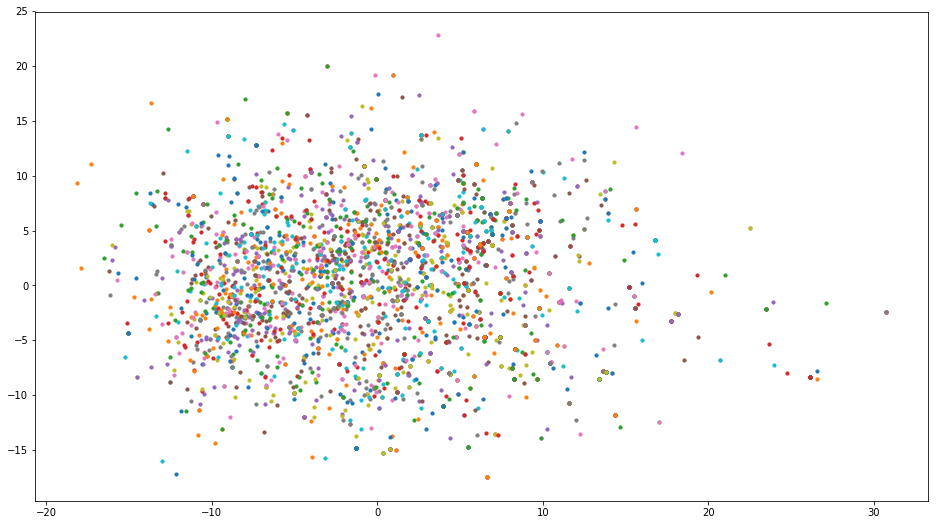

In [182]:
# 对高维维的词向量进行降维处理，用于可视化
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(tag_vec)
tag_vec2 = pca.fit_transform(tag_vec)


# 生成散点图观察二维词向量分布情况
plt.figure(figsize=(16, 9),)

for vec2 in tag_vec2:
    plt.scatter(vec2[0], vec2[1], s=10)
plt.show()


Kmeans score: 99.7732707864143


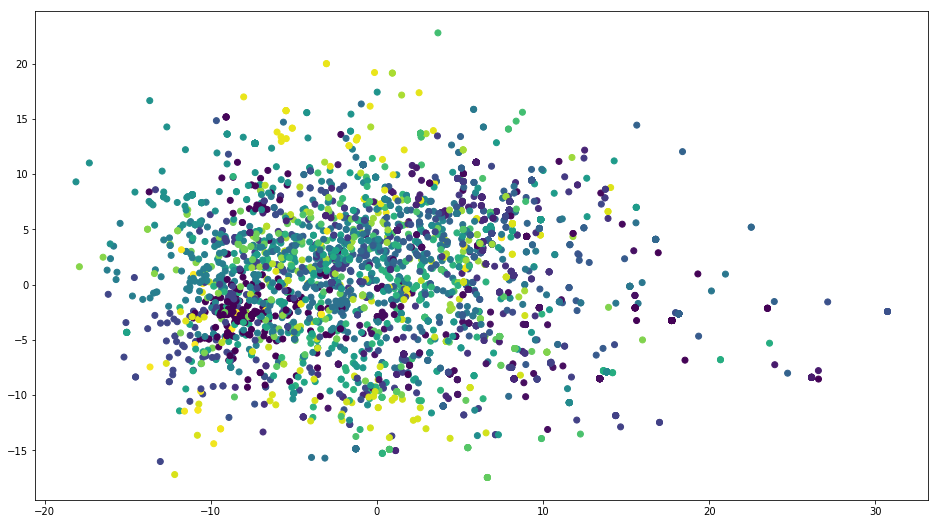

In [296]:
# 二维聚类或高维聚类
from sklearn.cluster import KMeans
from sklearn import metrics
plt.figure(figsize=(16, 9),)
cluster_count = 150
km = KMeans(n_clusters=cluster_count).fit(tag_vec)
predict_tag = km.labels_
print('Kmeans score:', metrics.calinski_harabaz_score(tag_vec, predict_tag) ) 
plt.scatter(tag_vec2[:, 0], tag_vec2[:, 1], c=predict_tag)
plt.show()

In [205]:
# 高维聚类后再降维可视化
from sklearn.cluster import KMeans
from sklearn import metrics

score = []
for i in range(100, 200):
    print(i)
    predict_tag_h = KMeans(n_clusters=i).fit_predict(tag_vec)
    score.append(metrics.calinski_harabaz_score(tag_vec, predict_tag_h))
#     print(i, 'Kmeans score:', metrics.calinski_harabaz_score(tag_vec2, predict_tag_h)) 


100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


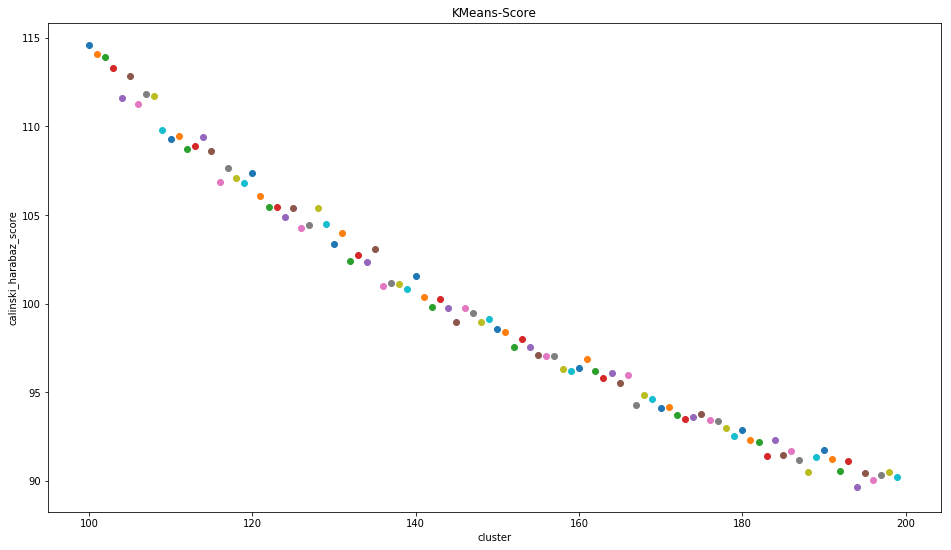

In [206]:
plt.figure(figsize=(16, 9),)

for idx, i in enumerate(score): 
    plt.scatter(idx + 100, i)
plt.title('KMeans-Score')
plt.xlabel('cluster')
plt.ylabel('calinski_harabaz_score')
plt.show()

In [214]:
i = 0
tag_dict = {}
for i in range(cluster_count):
    tag_dict[i] = []
while i < len(tag_vec2):
    tag_dict[predict_tag[i]].append(comment_tag[i])
    i += 1

for k,v in tag_dict.items():
    print(k, set(v), len(v))
    

0 {'买+高', '购买+高'} 3
1 {'炫彩+贴心', '一行+白鹭+青天', '差别+太小', '白鹭+青天', '指纹+科幻', '打来了 不是+到了', '时间段+一样', '单面+口', '阜通站+站长', '色彩+速度+很快 很满意', '解锁 需要+重压', '买了+不错', '效果好  质量+优秀', '后续+行', '外观设计+很好', '^+耐看', '手感+价格+刚刚好', '外包+胶纸', '灯照+才', '看起来+不错', '值得+比xr 抢太多  编不下去了 买不起', '水机+性价比+高', '喿蛋+回复', '霸王+条款', '购买 价格+美丽 ??', 'oppo 是国产大牌  我很喜欢 \n最近+活动', '指纹+拖后腿', '奖学金+钱', '小段+话', '媳妇+电话  今天', '买+到了', '过渡+动画', '到了+不错', '识别系统+奇妙', '法律+牛', '整体+结构+不错 功能性', '总台+电话', '电池+很好', '速度快  拍照+效果好  质量+优秀', '时间了 然后+客服', '客服+服务态度+很好', '商品+很好', '性价比+颜色', '&+不值钱', '快捷  希望+好', '顾客+买单', '问题  估计+游戏', '小哥 服务+态度', '速度+较快', '大小+合适哒', '流畅 一如既往+放心', ';+体验', '版本。\n其他+数据', 'iPhone xs ，iPhone x跑分+成绩', '姐姐+热心', '很高 同学们+羡慕  在京东', '游戏+问题  估计+游戏', '速度快\n质量+好', '性能+蛮多 上手', '灵敏度+不够 跟我', '填充物+可能会', '电池+很给力', '整体+屏幕+强大 音质', '颜色+喜气+不错', '指纹+很好', '外力+所致', '条款+深信不疑！\n退货', '脾气+很好', '品质  手机+功能+强大 音质', '手机+两台', '民族+风', '艺术品+无疑', '渐变色+真是', '专业+摄影师', '空调+跑步机', '真让人+心寒', '聋子+耳朵+摆设', '很快 样子+屏幕 好评 ！', '过多+关注', '手机+质量+很好', '&+;', '数据线+合适', '毛病 很好用 挺不错的 拍照+不错 最主要

In [305]:
import Category_old
# change_dict = {}
known_count = 0
accurate_count = 0
for k,v in tag_dict.items():
    print(k, set(v), len(v))
#     if k in unknown_tag:
#         unknown_count+=len(v)
    for kk,vv in Category_old.known_tag.items():
        if k in vv:
            known_count += len(v)
            break
    for kk,vv in Category_old.accurate_tag.items():
        if k in vv:
            accurate_count += len(v)
            break
print(known_count,'--',accurate_count)
#     dd = {}
#     for wword in set(v):
#         pre = km.predict([get_vec_of_tag(wword)])
#         dd[pre[0]] = 0
#     for wword in set(v):
#         pre = km.predict([get_vec_of_tag(wword)])
#         dd[pre[0]] += 1
#     max = -1
#     max_count = -1
#     for kk,vv in dd.items():
#         if vv > max_count:
#             max_count = vv
#             max = kk
#     change_dict[k] = max
#     print(k, '->',max)
#     if k > 10: 
#         break
# for before, after in change_dict.items():
#     print(before, '->',after)

0 {'买+高', '购买+高'} 3
1 {'炫彩+贴心', '一行+白鹭+青天', '差别+太小', '白鹭+青天', '指纹+科幻', '打来了 不是+到了', '时间段+一样', '单面+口', '阜通站+站长', '色彩+速度+很快 很满意', '解锁 需要+重压', '买了+不错', '效果好  质量+优秀', '后续+行', '外观设计+很好', '^+耐看', '手感+价格+刚刚好', '外包+胶纸', '灯照+才', '看起来+不错', '值得+比xr 抢太多  编不下去了 买不起', '水机+性价比+高', '喿蛋+回复', '霸王+条款', '购买 价格+美丽 ??', 'oppo 是国产大牌  我很喜欢 \n最近+活动', '指纹+拖后腿', '奖学金+钱', '小段+话', '媳妇+电话  今天', '买+到了', '过渡+动画', '到了+不错', '识别系统+奇妙', '法律+牛', '整体+结构+不错 功能性', '总台+电话', '电池+很好', '速度快  拍照+效果好  质量+优秀', '时间了 然后+客服', '客服+服务态度+很好', '商品+很好', '性价比+颜色', '&+不值钱', '快捷  希望+好', '顾客+买单', '问题  估计+游戏', '小哥 服务+态度', '速度+较快', '大小+合适哒', '流畅 一如既往+放心', ';+体验', '版本。\n其他+数据', 'iPhone xs ，iPhone x跑分+成绩', '姐姐+热心', '很高 同学们+羡慕  在京东', '游戏+问题  估计+游戏', '速度快\n质量+好', '性能+蛮多 上手', '灵敏度+不够 跟我', '填充物+可能会', '电池+很给力', '整体+屏幕+强大 音质', '颜色+喜气+不错', '指纹+很好', '外力+所致', '条款+深信不疑！\n退货', '脾气+很好', '品质  手机+功能+强大 音质', '手机+两台', '民族+风', '艺术品+无疑', '渐变色+真是', '专业+摄影师', '空调+跑步机', '真让人+心寒', '聋子+耳朵+摆设', '很快 样子+屏幕 好评 ！', '过多+关注', '手机+质量+很好', '&+;', '数据线+合适', '毛病 很好用 挺不错的 拍照+不错 最主要

In [293]:
import re
with open('Category.txt') as file:
    file_content = file.read()
    for before, after in change_dict.items():
        file_content = re.sub(r'\b'+str(before)+r'\b', str(after), file_content)
#     file.write(file_content)
with open('Category_n.py', 'w') as new_file:
    new_file.write(file_content)

In [297]:
i = 0
tag_dict_new = {}
for i in range(cluster_count):
    tag_dict_new[i] = []
while i < len(tag_vec2):
    tag_dict_new[predict_tag[i]].append(comment_tag[i])
    i += 1

for k,v in tag_dict_new.items():
    print(k, set(v), len(v))

0 {'炫彩+贴心', '一行+白鹭+青天', '差别+太小', '白鹭+青天', '指纹+科幻', '打来了 不是+到了', '时间段+一样', '单面+口', '阜通站+站长', '色彩+速度+很快 很满意', '解锁 需要+重压', '买了+不错', '效果好  质量+优秀', '后续+行', '外观设计+很好', '棒棒棒,好 好东西+便宜', '情侣+款+嘛', '^+耐看', '手感+价格+刚刚好', '外包+胶纸', '平台+可靠', '灯照+才', '看起来+不错', '值得+比xr 抢太多  编不下去了 买不起', '水机+性价比+高', '喿蛋+回复', '一家+店铺', '霸王+条款', '购买 价格+美丽 ??', 'oppo 是国产大牌  我很喜欢 \n最近+活动', '指纹+拖后腿', '奖学金+钱', '小段+话', '国货+精品', '媳妇+电话  今天', '买+到了', '过渡+动画', '到了+不错', '识别系统+奇妙', '法律+牛', '整体+结构+不错 功能性', '总台+电话', '电池+很好', '速度快  拍照+效果好  质量+优秀', '时间了 然后+客服', '客服+服务态度+很好', '商品+很好', '性价比+颜色', '&+不值钱', '快捷  希望+好', '问题  估计+游戏', '小哥 服务+态度', '速度+较快', '大小+合适哒', '流畅 一如既往+放心', ';+体验', '版本。\n其他+数据', 'iPhone xs ，iPhone x跑分+成绩', '很高 同学们+羡慕  在京东', '游戏+问题  估计+游戏', '速度快\n质量+好', '性能+蛮多 上手', '灵敏度+不够 跟我', '填充物+可能会', '电池+很给力', '整体+屏幕+强大 音质', '颜色+喜气+不错', '指纹+很好', '外力+所致', '条款+深信不疑！\n退货', '脾气+很好', '品质  手机+功能+强大 音质', '手机+两台', '民族+风', '艺术品+无疑', '渐变色+真是', '专业+摄影师', '空调+跑步机', '真让人+心寒', '聋子+耳朵+摆设', '很快 样子+屏幕 好评 ！', '过多+关注', '免息+舒服', '手机+质量+很好', '&+;', '数据线+合适'

In [216]:
len(comment_tag)

4376

In [303]:
from Category import accurate_tag,known_tag,unknown_tag
known_count = 0
accurate_count = 0
unknown_count = 0
for k,v in tag_dict_new.items():
    if k in unknown_tag:
        unknown_count+=len(v)
    for kk,vv in known_tag.items():
        if k in vv:
            known_count += len(v)
            break
    for kk,vv in accurate_tag.items():
        if k in vv:
            accurate_count += len(v)
            break
print(unknown_count,'--',known_count,'--',accurate_count)

880 -- 911 -- 1311


In [271]:
km.cluster_centers_
from Category import *
def extract_tag(sentence):
    s = HanLP.parseDependency(sentence) # 词法依存分析 
    print(s)
    word_array = s.getWordArray()
    category = []
    for word in word_array:
        tag = deperal_principle(word)
        print(tag)
        cat = km.predict(get_vec_of_tag(tag))
        if cat in unknown_tag:
            continue
        else:
            find = False
            for k_tag, tag_list in known_tag.items():
                if cat in tag_list:
                    category.append(k_tag)
                    find = True
                    break
            if find:
                continue
            for k_tag, tag_list in accurate_tag.items():
                if cat in tag_list:
                    category.append(k_tag)
                    find = True
                    break
            if find:
                continue
extract_tag('iphoneX 的运行很快，外观很好看')            

1	iphoneX 的运行	iphoneX 的运行	v	v	_	0	核心关系	_	_
2	很快	很快	d	d	_	1	动补结构	_	_
3	，	，	wp	w	_	1	标点符号	_	_
4	外观	外观	n	n	_	6	主谓关系	_	_
5	很	很	d	d	_	6	状中结构	_	_
6	好看	好看	a	a	_	1	并列关系	_	_

None


AttributeError: 'NoneType' object has no attribute 'split'

In [298]:
# save kmeans model
from sklearn.externals import joblib

joblib.dump(km, 'kmeans.pkl')

        

['kmeans.pkl']

In [275]:
km.predict([get_vec_of_tag('屏幕+绚丽')])

['屏幕', '绚丽']


array([109], dtype=int32)